# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# sum costs by year
hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()

# SPLIT HYDROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in hydrological_data['Disaster Type'].unique():
    print(dtype)

Flood
Landslide


In [5]:
# create new dataframes for each type
flood_data = hydrological_data[hydrological_data['Disaster Type'] == 'Flood']
landslide_data = hydrological_data[hydrological_data['Disaster Type'] == 'Landslide']

# count number of disasters in each year for each subgroup
flood_disaster_counts = flood_data['Year'].value_counts().sort_index()
landslide_disaster_counts = landslide_data['Year'].value_counts().sort_index()

# save index of years
flood_disaster_counts_index = flood_disaster_counts.index
landslide_disaster_counts_index = landslide_disaster_counts.index

# PLOT HYDROLOGICAL DISASTERS

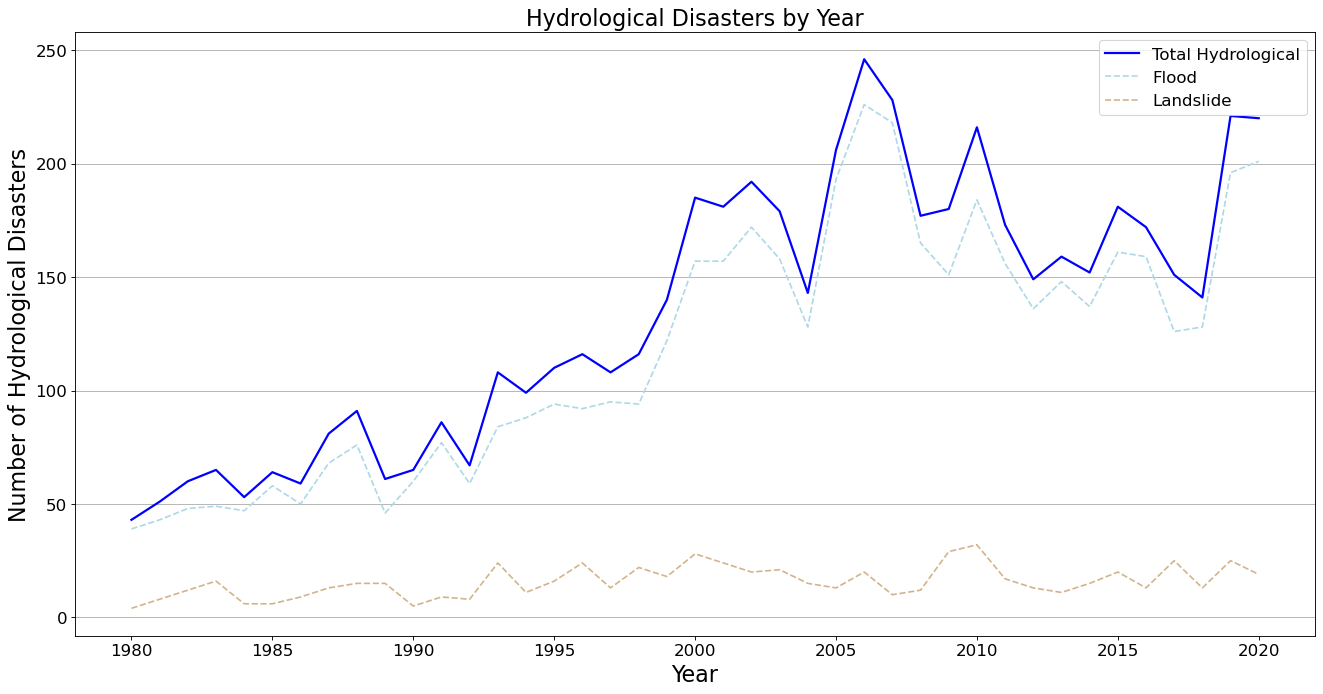

In [6]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hydrological Disasters")
plt.plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linewidth=2, color = 'blue')
plt.plot(flood_disaster_counts_index, flood_disaster_counts, linestyle = '--', color = 'lightblue')
plt.plot(landslide_disaster_counts_index, landslide_disaster_counts, linestyle = '--', color = 'tan')

plt.legend(['Total Hydrological', 'Flood', 'Landslide'])

# HYDROLOGICAL DISASTER COSTS

In [7]:
flood_costs = flood_data[['Year', 'Total Damages']]
flood_costs = flood_costs.groupby('Year').sum()

landslide_costs = landslide_data[['Year', 'Total Damages']]
landslide_costs = landslide_costs.groupby('Year').sum()

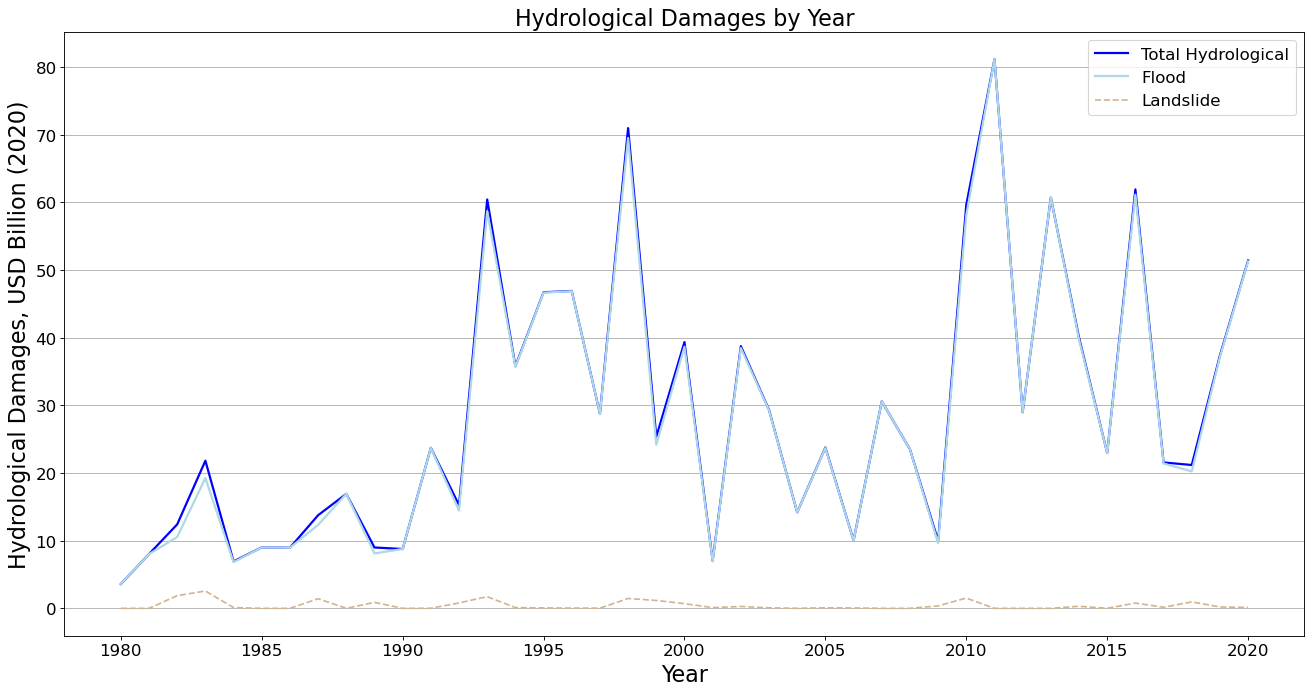

In [8]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Hydrological Damages, USD Billion (2020)")
plt.plot(hydrological_costs.index, hydrological_costs['Total Damages'], linewidth=2, color = 'blue')
plt.plot(flood_costs.index, flood_costs['Total Damages'], linewidth=2, color = 'lightblue')
plt.plot(landslide_costs.index, landslide_costs['Total Damages'], linestyle = '--', color = 'tan')

plt.legend(['Total Hydrological', 'Flood', 'Landslide'])

# BOXPLOT HYDROLOGICAL DAMAGES BY DECADE

{'whiskers': [<matplotlib.lines.Line2D at 0x27d70267f88>,
 'caps': [<matplotlib.lines.Line2D at 0x27d7025d288>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d7025da88>,
 'medians': [<matplotlib.lines.Line2D at 0x27d70259048>,
 'fliers': [<matplotlib.lines.Line2D at 0x27d70259c88>,
 'means': []}

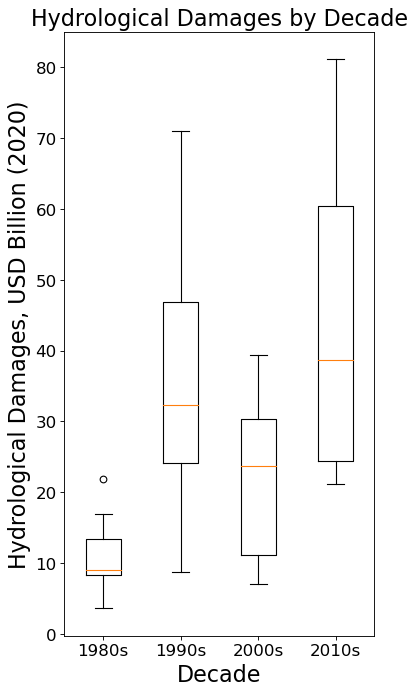

In [9]:
hydrological_box_data = [hydrological_costs['Total Damages'][0:10], hydrological_costs['Total Damages'][10:20], hydrological_costs['Total Damages'][20:30], hydrological_costs['Total Damages'][30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Hydrological Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Hydrological Damages, USD Billion (2020)")

plt.boxplot(hydrological_box_data, labels = box_labels)